# Chapter 3: Probability and Information Theory

In [1]:
import numpy as np
import tensorflow as tf
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

Probability theory is a mathematical framework for representing uncertain statements. It provides a means of quantifying uncertainty as well as axioms for deriving new uncertain statements. In artificial intelligence applications, we use probability theory in two major ways. First, the laws of probability tell us how AI systems should reason, so we design our algorithms to compute or approximate various expressions derived using probability theory. Second, we can use probability and statistics to theoretically analyze the behaviour of proposed AI systems.

## 3.1 Why Probability?

Machine learning must always deal with uncertain quantities and sometimes stochastic (nondeterministic) quantities. Uncertainty and stochasticity can arise from many sources. There are three possible sources of uncertainty:

  1. **Inherent stochasticity in the system being modeled**. For example, most interpretations of quantum mechanics describe the dynamics of subatomic particles as being probabilistic. We can also create theoretical scenarios that we postulate to have random dynamics, such as the hypothetical card game where we assume that the cards are truly shuffled into a random order.
  2. **Incomplete observability**. Even deterministic systems can appear stochastic when we cannot observe all variables that drive the behavior of the system. For example, in the Monty Hall problem, a game show contestant is asked to choose between three doors and wins a prize behind the chosen door. Two doors lead to a goat while a third leads to a car. The outcome given the contestant's choice is deterministic, but from the contestant's point of view, the outcome is uncertain.
  3. **Incomplete modelling**. When we use a model that must discard some of the information we have observed, the discarded information results in uncertainty in the model's predictions. For example, suppose we build a robot that can exactly observe the location of every object around it. If the robot discretizes space when predicting the future location of these objects, then the discretization makes the robot immediately become uncertain about the precise position of objects: each object could be anywhere within the discrete cell it was observed to occupy.
  
In many cases, it is more practical to use a simple but uncertain rule than a complex but certain one, even if the true rule is deterministic and our modeling systems has the fidelity to accomodate a complex rule.

Probability theory was originally developed to analyze the frequency of vents. It is easy to see how probability theory can be used to study events like drawing of a certain hand of cards in a poker game. These kinds of events are often repeatable. When we say an outcome has a probability $p$ of occuring, it means that if we repeated the experiment (e.g. drawing a hand of cards) infinitely many times, then proportion $p$ of the repetitions would result in that outcome. This kind of reasoning does not seem immediately applicable to propositions that are not repeatable. If a doctor analyzes a patient and says that the patient has a 40 percent chance of having the flu, this means something very different - we cannot make infinitely many replicas of the parient, nor is there any reason to believe that different replicas of the patient would present with the same symptoms yet have carying underlying conditions. In the case of the doctor diagnosing the patient, we use probability to represent a **degree of belief**, with 1 representing a bsolute certainty that the patient has the flu and 0 indicating absolute certainty that the patient does not have the flue. The former king od probability, related directly to the rates at which events occur, is known as **frequentist probability**, while the latter, related to qualitative levels of certainty, is known as **Bayesian probability**.

## 3.2 Random Variables

A **random variable** is a variable that can take on different values randomly. We typically denote the random variable itself with a locercase letter in plain typeface and the values it can take on with lowercase script letters. For example, $x_{1}$ and $x_{2}$ are both possible values that the random variable x can take on. For vector-values variables, we would write the random variable as **x** and ones of its values as $\boldsymbol{x}$. On its own, a random variable is just a description of the states that are possible; it must be coupled with a probability distribution that specifies how likely each of these states are.

## 3.3 Probability Distributions

A **probability distribution** is the decription of how likely a random variable or set of random variables is to take on each of its possible states. The way we describe probability distributions depends on whether the variables are discrete or continuous.

### 3.3.1 Discrete Variable and Probability Mass Functions

A probability distribution over discrete variables may be described using a **probability mass functions** (PMF). We typically denote probability mass functions with a capital $P$. Often we associate each random variable with a different probability mass funtion and the reader must infer which PMF to used based on the identity of the random variable rather than on the name of the function: $P(x)$ is usually not the same as $P(y)$.

The probability mass function maps from a state of a random variable to the probability of that random variable taking on that state. The probability that x = $x$ is denoted as $P(x)$ with probability of 1 indicating that x = $x$ is certain and a probability of 0 indicating that x = $x$ is impossible. Sometimes to disambiguate which PMF to use, we write the name of the random variable explicitly: $P(\text{x} = x)$. Sometimes we define a variable first, the use ~ notation to specify which distribution it follows later: $\text{x} \text{~} P(\text{x})$.

Probability mass functions can act on many variables at the same time. Such a probability distribution over many variables is known as a **joint probability distribution**. $P(\text{x} = x, \text{y} = y)$ denotes the probability that $\text{x} = x$ and $\text{y} = y$ simultaneously. We may also write $P(x, y)$ for brevity.

To be a PMF on a random variable x, a function $P$ must satisfy the following properties:

  1. The domain of $P$ must be the set of all possible states of $\text{x}$.
  2. $\forall x \in \text{x}, 0 \leq P(x) \leq 1$. An impossible event has probability 0, and no state can be less than that. Likewise, an event that is guaranteed to happen has probability 1, and no state can have a greater chance of occuring.
  3. $\sum_{x\in \text{x}} P(x) = 1$. We refer to this property as being **normalized**. Withoutt his property, we could obtain probabilities greater than one by computing the probability of one of many events occurring.
  
For example, consider a single discrete random variable $\text{x}$ with $k$ different states. We can place a **uniform distribution** on $\text{x}$ - that is, make each of its states equally likely - by setting its PMF to $P(\text{x} = x_{i}) = \frac{1}{k}$ for all $i$.

We can see that this fits the requirements for a probability mass function. The value $\frac{1}{k}$ is positive because $k$ is a positive integer. We also see that $\sum_{i} P(\text{x} = x_{i}) = \sum_{i} \frac{1}{k} = \frac{k}{k} = 1$, so the distribution is properly normalized. 

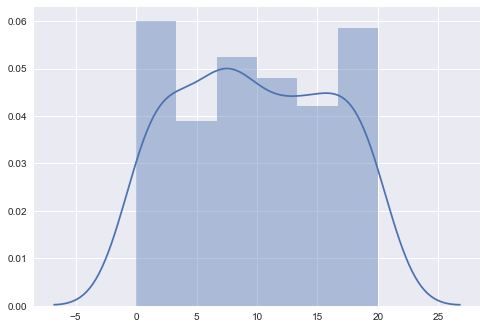

In [21]:
# draw 200 random samples from a uniform distribution over the range [0,21) generated by numpy and plot
samples = np.random.randint(low=0, high=21, size=200)  # if we change the size parameter to take greater inputs, we see the shape of the plot converge to a box shape
sns.distplot(samples)
plt.show()

### 3.3.2 Continuous Variable and Probability Density Functions

When working with continuous random variables, we describe probability distributions using a **probability density function** (PDF) rather than a probability mass function. To be a probability density function, a function $p$ must satisfy the following properties:

  1. The domain of $p$ must be the set of all possible states of $\text{x}$.
  2. $\forall x \in \text{x}, p(x) \geq 0$. Note that we do not require $p(x) \leq 1$.
  3. $\int p(x)dx = 1$.

A probability density function $p(x)$ does not give the probability of a specific state directly; instead the probability of landing inside an infinitesimal region with volume $\delta x$ is given by $p(x)\delta x$.

We can integrate the density function to find the actual probability mass of a set of points. Specifically, the probability that $x$ lies in some set $\mathbb{S}$ is given by the integral of $p(x)$ over that set. In the univariate example, the probability that $x$ lies in the interval $[a, b]$ is given by $\int_{[a, b]}p(x)dx$.

For an example of a PDF corresponding to a specific probability density over a continuous random variable, consider a uniform distribution on an interval of the real numbers. We can do this with a function $u(x; a, b)$ where $a$ and $b$ are the endpoints of the interval, with $b > a$. The ";" notation means "parametrized by"; we consider $x$ to be the argument of the function, while $a$ and $b$ are parameters that define the function. To ensure that there is no probability mass outside the interval, we say $u(x; a, b) = 0$ for all $x \notin [a, b]$. Within $[a, b],\: u (x; a, b) = \frac{1}{b-a}$. We can see that this is non-negative everywhere. Additionally, it integrates to 1. We often denote that $x$ follows the uniform distribution on $[a, b]$ by writing $x$ ~ $U(a, b)$.

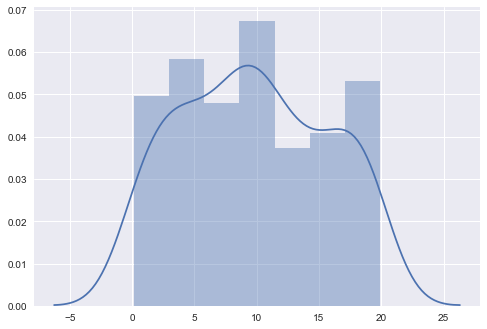

In [26]:
# draw 200 random samples from a uniform distribution over the range [0,21) generated by numpy and plot
samples = np.random.uniform(low=0.0, high=20.0, size=200)  # if we change the size parameter to take greater inputs, we see the shape of the plot converge to a box shape
sns.distplot(samples)
plt.show()

## 3.4 Marginal Probability

Sometimes we know the probability distribution over a set of variables and we want to know the probability distribution over just a subset of them. The probability distribution over the subset is known as the **marginal probability distribution**. 

For example, suppose we have discrete random variables x and y, and we know $P(x, y)$. We can find $P(x)$ with the **sum rule**: $\forall x \in \text{x}, P(\text{x} = x) = \sum_{t} P(\text{x} = x, \text{y} = y)$.

The name "marginal probability" comes from the process of computing marginal probabilities on paper. When the values of $P(x, t)$ are written in a grid with different values of $x$ in rows and different values of $y$, it is natural to sum across the row of the grind, then write $P(x)$ in the margin of the paper just to the right of the row.

For continuous variables, we need to use integration instead of instead of summation: $p(x) = \int \: p(x, y)dy$.

## 3.5 Conditional Probability

In many cases, we are interested in the probability of some event, given that some other event has happened. This is called a **conditional probability**. We denote the probability that $\text{y} = y$ given $\text{x} = x$ as $P(\text{y} = y \: | \: \text{x} = x)$. This is a conditional probability that can be computed with the formula

$P(\text{y} = y \: | \: \text{x} = x) = \frac{P(\text{y} = y, \text{x} = x)}{P(\text{x} = x)}$.

The conditional probability is only defined when $P(\text{x} = x) > 0$. We cannot compute the conditional probability conditioned on an event that never happens.

## 3.6 The Chain Rule of Conditional Probabilities

Any joint probability distribution of many random variables may be decomposed into conditional distributions over only one variable: $P(x^{(1)},...,x^{(n)}) = P(x^{(1)})\prod_{i=2}^{n}P(x^{(1)},...,x^{(i-1)})$.

This observation is known as the **chain rule**, or **product rule**, of probability. It follows immediately from the definition of conditional probability given above.

For example, applying the definition twice, we get

  $P(a, b, c) = P(a \: | \: b, c)P(b, c) \\
  P(b, c) = P(b \: | \: c)P(c) \\
  P(a, b, c) = P(a \: | \: b, c)P(b \: | \: c)P(c)$
  

## 3.7 Independence and Conditional Independence

Two random variables x and y are **independent** if their probability distribution can be expressed as a product of two factors, one involving only x and one involving only y: $\forall x \in x, y, \in y, p(x = x, y = y) = p(x = x)p(y=y)$. 

Two random variables x and y are **conditionally independent** given a random variable x if the conditional probability distribution over x and y factorizes in this way for every value of z: $\forall x \in x, y \in y, z \in z, \: p(x = x, y = y \: | \: z = z) = p(x = x \: | \: z = z)p(y=y \: | \: z=z)$.

## 3.8 Expectation, Variance, and Covariance

The **expectation** or **expected value** of some function $f(x)$ with respect to the probability distribution $P(x)$ is the average, or mean value, that $f$ takes on when $x$ is drawn from $P$. For discrete variables this can be computed with the summation: 

$\quad \quad \quad \quad \quad \mathbb{E}_{x \sim P} [f(x)] = \sum_{x} P(x)f(x)$

while for continuous variables, it is computed with an integral:

$\quad \quad \quad \quad \quad \mathbb{E}_{x \sim P} [f(x)] = \int P(x)f(x)dx$

In [59]:
samples = np.random.randint(high=20, low=0, size=100)  # generate 100 random integers in range [0, 20)
samples

array([19, 17, 17,  0,  0, 11, 14, 16,  3,  8, 18,  7, 16, 14, 16,  9,  7,
        0,  9, 19,  9,  2,  9,  3,  1,  6, 13, 15, 14,  5,  6, 11, 18, 13,
       19,  1, 16,  4, 17, 19,  4,  6, 18, 12,  8,  7, 19,  2, 18,  9,  6,
        8, 14,  4, 15, 11,  5,  1, 11, 14, 13, 10, 19,  7, 19, 18,  7, 15,
       18,  2, 15, 15,  8, 17,  6,  8, 13, 18,  3, 10, 15,  1,  8, 17,  1,
       12,  5,  8, 11,  4,  5, 13, 18,  5,  2,  4,  4, 15, 17, 10])

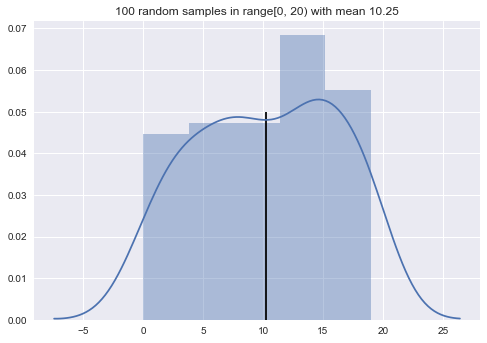

In [43]:
mean = np.mean(samples)  # calculate the mean

sns.distplot(samples)  # plot the sample distribution
plt.vlines(mean, 0, 0.05)  # add black vertical bar to indicate the mean value
plt.title("100 random samples in range[0, 20) with mean "+str(mean))
plt.show()

The **variance** give a measure of how much the value of a function of a random variable x cary as we sample different values of x from its probability distribution:

$\quad \quad \quad \quad \quad Var(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]$

When the variance is low, the values of $f(x)$ cluster near their expected value. The square root of the variance is known as the **standard deviation**.


In [60]:
# recall samples = np.random.randint(high=20, low=0, size=100)  # generate 100 random integers in range [0, 20)
var = np.var(samples)  # calculate variance
var

34.285899999999998

In [62]:
# calculate standard deviation as the sqrt of var
sd = np.sqrt(var)
sd

5.8554162960459095

In [64]:
# double check against np.std()
sd = np.std(samples)
sd

5.8554162960459095

The **covariance** gives some sense of how much two values are linearly related to each other, as well as the scale of these variables:

$\quad \quad \quad \quad \quad Cov(f(x), g(y)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])(g(y)-\mathbb{E}[g(y)])]$

High absolute values of the covariance mean that the values change very much and are both far from their respective means at the same time. If the sign of the covariance is positive, then both variables take on relatively high values simultaneously. If the sign of the covariance is negative, then one variable tends to take on a relatively high value at the same time that the other variable takes on a relatively low value, and vice versa.

Other measures such as **correlation** normalize the contribution of each variable in order to measure only how much the variables are related, rather than also being affected by the scale of the separate variables.

The notions of covariance and dependence are related but distinct concepts. They are related because two variables that are independent have zero covariance and two variables that have nonzero covariance are dependence. Independence, however, is a distinct property from covariance For two variables to have zero covariance, there must be no linear dependence between them. Independence is a stronger requirement than zero covariance, because independence also excludes nonlinear relationships. It is possible for two variables to be dependent but have zero covariance. 

For example, suppose we first sample a real number $x$ from a uniform distribution over the interval $[-1, 1]$. We next sample a random variable $s$. With probability $\frac{1}{2}$ we choose the value of $s$ to be 1. Otherwise, we choose the value of $s$ to be -1. We can then generate a random variable $y$ by assigning $y=sx$. Clearly, $x$ and $y$ are not independent, because $x$ completely determines the magnitude of $y$. However, $Cov(x, y) = 0$.

The **covariance matrix** of a random vector $\boldsymbol{x} \in \mathbb{R}^n$ is a $n \times n$ matrix, such that

$\quad \quad \quad \quad \quad Cov(\boldsymbol{x})_{i, j} = Cov(x_i, x_j)$.

The diagnonal elements of the covariance give the variance:

$\quad \quad \quad \quad \quad Cov(x_i, x_i) = Var(x_i)$.

## 3.9 Common Probability Distributions

Several simple probability distributions are useful in many contexts in machine learning.

### 3.9.1 Bernoulli Distribution

The **Bernoulli distribution** is a distribution over a single binary random variable. It is controlled by a single parameter $\phi \in [0,1]$, which gives the probability of the random variable being equal to 1. It has the following properties:

$\quad \quad \quad \quad \quad P(x = 1) = \phi \\
\quad \quad \quad \quad \quad P(x = 0) = 1 - \phi \\
\quad \quad \quad \quad \quad P(\text{x} = x) = \phi^x(1-\phi)^{1-x} \\
\quad \quad \quad \quad \quad \mathbb{E}_x[x] = \phi \\
\quad \quad \quad \quad \quad Var_x(x) = \phi(1-\phi)$

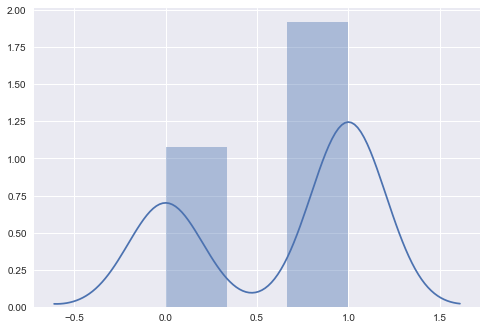

In [81]:
# generate 100 random samples drawn from a bernoulli distribution with P(x=1) = phi = 0.6
samples = np.random.binomial(n=1, p=0.6, size=100)   
samples

sns.distplot(samples)
plt.show()

In [82]:
# we can show the last two properties of the bernoulli distribution by performing the relevant operations on our samples
# the first three can be proved with simple algebra
np.mean(samples)  # as we increase the number of samples, the mean converges towards 0.6

0.64000000000000001

In [83]:
np.var(samples)  # as we increase the number samples, the variance converges towards 0.6*04 = 0.24

0.23040000000000002

### 3.9.2 Multinoulli Distribution

The **multinoulli**, or **cateogrical**, **distribution** is a distribution over a single discrete variable with $k$ different states, where $k$ is finite. The multinoulli distribution is parametrized by a vector $\boldsymbol{p} \in [0, 1]^{k-1}$, where $p_i$ gives the probability of the $i$th state. The final, $k$th state's probability is given by $1 - \bf{1^\top p}$. Note that we must constrain $\bf{1^\top p} \leq 1$. Multinoulli distributions are often used to refer to distributions over categories of objects, so we do not usually assume that state 1 has numerical value 1, and so on. For this reason, we do not usually need to compute the expectation or variance of multinoulli-distributed random variables.

The Bernoulli and multinoulli distributions are sufficient to describe any distribution over their domain. They are able to describe any distribution over their domain not so much because they are particularly powerful, but rather because their domain is simple; they model discrete variables for which it is feasible to enumerate all the states. When dealing with continuous variables, there are uncountably many states, so any distribution described by a small number of parameters must impose struct limits on the distribution.

In [124]:
# we can simulate a 100 die rolls as an example of a multinomial distribution
# recall in a die roll, each face of the die has a 1/6 chance of landing face up
n = 100  # as we increase the number of rolls, each freq converges towards 0.1666...
freqs = np.random.multinomial(n=n, pvals=[1/6.]*6, size=1)[0]
freqs

array([14, 13, 24, 16, 16, 17])

In [125]:
# now norm each of the roll frequencies
normed_freqs = [i/n for i in freqs]  
normed_freqs

[0.14000000000000001,
 0.13,
 0.23999999999999999,
 0.16,
 0.16,
 0.17000000000000001]

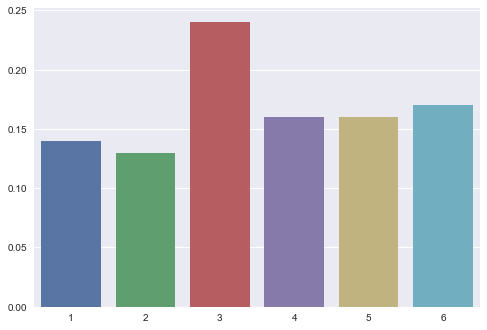

In [126]:
rolls = [1, 2, 3, 4, 5, 6]
sns.barplot(rolls, normed_freqs)
plt.show()

### 3.9.3 Gaussian Distribution

The most commonly used distribution over real numbers is the **normal distribution**, also known as the **Gaussian distribution**:

$ \quad \quad \quad \quad \quad \mathcal{N}(x; \mu, \sigma^2) = \sqrt{\frac{1}{2 \pi \sigma^2}}exp(-\frac{1}{2\sigma^2}(x-\mu)^2)$.

The two parameters $\mu \in \mathbb{R}$ and $\sigma \in (0, \infty)$ control the normal distribution. The parameter $\mu$ gives the coordinate of the central peak. This is also the mean of the distribution: $\mathbb{E}[x] = \mu$. The standard deviation of the distribution is given by $\sigma$, and the variance by $\sigma^2$.

When we evaluate the PDF, we need to square and invert $\sigma$. When we need to frequently evaluate the PDF with different parameter values, a more efficient way of parametrizing the distribution is to use a parameter $\beta \in (0, \infty)$ to control thee **precision**, or inverse variance, of the distribution:

$ \quad \quad \quad \quad \quad \mathcal{N}(x; \mu, \beta^{-1}) = \sqrt{\frac{\beta}{2 \pi}}exp(-\frac{1}{2}\beta(x-\mu)^2)$.

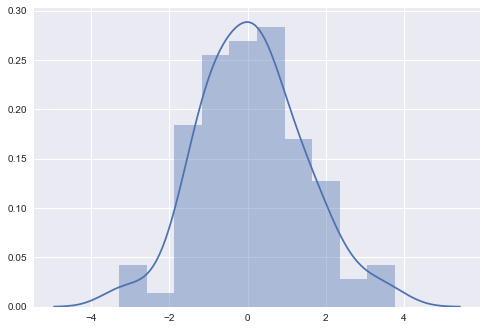

In [16]:
# draw 100 random samples from a 0-mean normal distribution and variance of 1.5
# as we increase size, the graph converges towards the classic bell shape
# to increase the width of the peak, we increase variance
# np.random.normal is parameterized by the sd, so we take the sqrt of the desired variance
samples = np.random.normal(scale=np.sqrt(1.5), size=100)  
sns.distplot(samples)
plt.show()

Normal distributions are a sensible choice for many applications. In the absence of prior knowledge about what form a distribution over the real numbers should take, the normal distribution is a good default for two major reasons. 

First, many distributions we wish to model are truy close to being normal distributions. The **central limit theorem** shows that the sum of many independent random variables is approximately normally distributed. This means that in practice, many complicated systems can be modelled successfully as normally distributed noise, even if the system can be decomposed into parts with more structured behaviour.

Second, out of all possible probability distributions with the same variance, the normal distribution encodes the maximum amount of uncertainty over the real numbers. We can thus think of the normal distribution as the one that inserts the least amount of prior knowledge into a model.

The normal distribution generalizes to $\mathbb{R}^n$, in which case it is known as the **multivariate normal distribution**. It may be parametrized with a positive definite symmetric matrix $\sum$:

$ \quad \quad \quad \quad \quad \mathcal{N}(x; \mu, \sum) = \sqrt{\frac{1}{(2 \pi)^n det(\sum)}}exp(-\frac{1}{2}(x-\mu)^\top \sum^-1 (x-mu))$.

The parameter $\mu$ gives the mean of the distribution, though it is now vector values. The parameter $\sum$ gives the covariance matrix of the distribution. 

As in the univariate case, when we wish to evaluate the PDF several times for many different parameters, the covariance matrix is not a computationally efficient way to parametrize the distribution, since we need to invert $\sum$ to evaluate the PDF. We can instead use a **precision matrix** $\beta$:

$ \quad \quad \quad \quad \quad \mathcal{N}(x; \mu, \sum) = \sqrt{\frac{det(\beta}{(2 \pi)^n}}exp(-\frac{1}{2}(x-\mu)^\top \beta (x-mu))$

We often fix the covariance matrix to be a diagonal matrix. An even simpler version is the **isotropic** Gaussian distribution, whose covariance matrix is a scalar times the identity matrix.

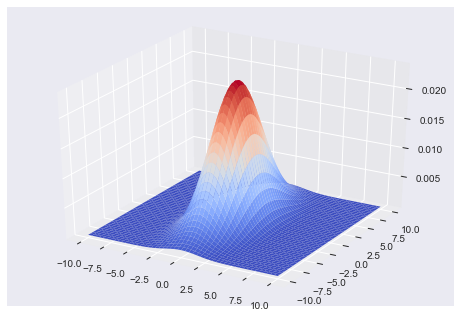

In [15]:
# plot a multivariate normal distribution with mean 0
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# set parameters for mean and variance
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#  create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap="coolwarm",linewidth=0)
plt.show()

### 3.9.4 Exponential and Laplace Distributions

In the context of deep learning, we often want to have a probability distribution with a sharp point at $x = 0$. To accomplish this, we can use the **exponential distribution**:

$ \quad \quad \quad \quad \quad p(x;\lambda) = \lambda \boldsymbol{1}_{x \geq 0} exp(-\lambda x)$.

The exponential distribution uses the indicator function $\boldsymbol{1}_{x \geq 0}$ to assign probability zero to all negative values of $x$.

A closely related probability distribution that allows us to place a sharp peak of probability mass at an arbitrary point $\mu$ is the **Laplace distribution**

$ \quad \quad \quad \quad \quad Laplace(x; \mu, \gamma) = \frac{1}{2\gamma} exp (-\frac{|x-\mu|}{\gamma})$

### 3.9.5 The Dirac Distribution and Empirical Distribution

In some cases, we wish to specify that all the mass in a probability distribution clusters around a single point. This can be accomplished by defining a PDF by the **Dirac delta function**, $\delta(x)$:

$ \quad \quad \quad \quad \quad p(x) = \delta(x- \mu)$

The Dirac delta function is defined such that it is zero-values everywhere except 0, yet integrates to 1. The Dirac delta function is not an ordinary function that associates each value $x$ with a real-valued output; instead it is a different kind of mathematical object called a **generalized function** that is defined in terms of its properties when integrated. We can think of the Dirac delta function as being the limit point of a series of functions that put less and less mass on all points other than zero.

By defining $p(x)$ to be $\delta$ shifted by $-\mu$, we obtain an infinitely narrow and infinitely high peak of probability where $x = \mu$.

A common use of the Dirac delta distribution is as a component of an **empirical distribution**,

$ \quad \quad \quad \quad \quad \hat{p}(x) = \frac{1}{m} \sum_{i=1}^{m}\delta(x-x^{(i)})$

which put probability mass $\frac{1}{m}$ on each of the $m$ points on $\boldsymbol{x}^(1)...\boldsymbol{x}^(m)$, forming a given data set or collection of samples. The Dirac delta distribution is only necessary to define the empirical distribution over continuous variables. For discrete variables, the situation is simple: an empirical distribution can be conceptualized as a multinoulli distribution, with a probability associated with each possible input value that is simply equal to the **empirical frequency** of that value in the training set.

We can view the empirical distribution formed from a dataset of training examples as specifying the distribution that we sample from when we train a model on this dataset. Another important perspective on the empirical distribution is that it is the probability density that maximizes the likelihood of the training data (see section 5.5).

### 3.9.6 Mixtures of Distributions

It is also common to define probability distributions by combining other simpler probability distributions. One common way of combining distributions is to construct a **mixture distribution**. A mixture distribution is made up of several component distributions. On each trial, the choice of which component distribution should generate the sample is determined by sampling a component identity from a multinoulli distribution:

$ \quad \quad \quad \quad \quad P(x) = \sum_i P(c=i) \: P(x \: | \: c = i)$

where $P(c)$ is the multinoulli distribution over component identities.

We have already seen one example of a mixture distribution: the empirical distribution over real-valued variables is a mixture distribution with one Dirac component for each training example. 

The mixture model is one simple strategy for combining probability distribution to create a richer distribution. The mixture model allows us to briefly glimpse a concept that will be of paramount importance later - the **latent variable**. A lentent variable is a random variable that we cannot observe directly. The component identity variable $c$ of the mixture model provides an example. Latent variables may be related to $x$ through the joint distribution, in this case, $P(x, c) = P(x :\ | :|c) \: P(c)$. The distribution $P(c)$ over the latent variable and the distribution $P(x \: | \: c)$ relating the latent variables to the visibile variables determines the shape of the distribution P(x), even though it is possible to describe $P(x)$ without referent to the latent variable. Latent variables are discussed further in section 16.5.

A very powerful and common type of mixture model is the **Gaussian mixture model**, in which the components $p(x \: | \: c=i)$ are Gaussians. Each component has a separately parametrized mean $\boldsymbol{\mu}^{(i)}$ and covariance $\sum^{(i)}$. Some mixtures can have more constraints. For example, the covariances could be shared across components via the constraint $\sum^{(i)} = \sum, \forall i$. As with a single Gaussian distribution, the mixture of Gaussians might constrain the covariance matrix to be diagonal or isotropic.

In addition to means and covariances, the parameters of a Gaussian mixture specify the **prior probability** $\alpha_i = P(c=i)$ given to each component $i$. The word "prior" indicates that it expresses the model's beliefs about $c$ *before* it has observed $\boldsymbol{x}$. By comparison, $P(c \: | \: \boldsymbol{x})$ is a **posterior probability**, because it is computed *after* observation of $\boldsymbol{x}$. A Gaussian mixture model is a **universal approximator** of densities, in the sense that any smooth density can be approximated with any specific nonzero amount of error by a Gaussian mixture with enough components.

## 3.10 Useful Properties of Common Functions

Certain functions arise often while working with probability distributions, especially the probability distributions used in deep learning models.

One of these functions is the **logistic sigmoid**:

$ \quad \quad \quad \quad \quad \sigma(x) = \frac{1}{1+exp(-x)}$

The logistic sigmoid is commonly used to produce the $\theta$ parameter of a Bernoulli distribution because its range is $(0, 1)$, which lies in the valid range of values for the $\theta$ parameter. The sigmoid function **saturates** when its argument is very positive or very negative, meaning that the function becomes very flat and insentitive to small changes in its input.

Another commonly encountered function is the **softplus function**:

$ \quad \quad \quad \quad \quad \zeta(x) = log(1+exp(x))$

The softplus function can be useful for producing the $\beta$ or $\sigma$ parameter of a normal distribution because its range is $(0, \infty)$. It arises commonly when  manipulating expressions involving sigmoids. The name of the softplus function comes from the fact that a smoothed, or "softened", version of 

$ \quad \quad \quad \quad \quad x^+ = max(0, x)$

The following properties are all useful enough that you may wish to memorize them:

$ \quad \quad \quad \quad \quad (1) \quad \sigma(x) = \frac{exp(x)}{exp(x)+exp(0)} \\
\quad \quad \quad \quad \quad (2) \quad \frac{d}{dx}\sigma(x) = \sigma(x)(1-\sigma(x)) \\
\quad \quad \quad \quad \quad (3) \quad 1-\sigma(x) = \sigma(-x) \\
\quad \quad \quad \quad \quad (4) \quad log \: \sigma(x) = -\zeta(-x) \\
\quad \quad \quad \quad \quad (5) \quad \frac{d}{dx} \zeta(x) = \sigma(x) \\
\quad \quad \quad \quad \quad (6) \quad \forall x \in (0,1), \sigma^{-1}(x) = log \:(\frac{x}{1-x}) \\
\quad \quad \quad \quad \quad (7) \quad \forall x > 0, \zeta^{-1}(x) = log \:(exp(x)-1) \\
\quad \quad \quad \quad \quad (8) \quad \zeta(x) = \int_{-\infty}^{x} \sigma (y) dy \\
\quad \quad \quad \quad \quad (9) \quad \zeta(x) -\zeta(x) - \zeta(-x) = x$

The function $\sigma^{-1}(x)$ is called the **logit** in statistics, but this term is rarely used in machine learning. The softplus function is intended as a smoothed version of the **positive part function**, $x^+ = max\{0, x\}$. The positive part function is the counterpart of the **negative part function**, $x^- = max\{0, -x\}$. To obtain a smooth function that is analagous to the negative part, one can use $\zeta(-x)$. Just as $x$ can be recovered from its positive part and its negative part via the identity $x^+ - x^- = x$, it is also possible to revoer $x$ using the same relationship between $\zeta(x)$ and $\zeta(-x)$ as shown in (9).

## 3.11 Bayes' Rule

We often find ourselves in a situation where we know $P(y \: | \: x)$ and need to know $P(x \: | \: y)$. Fortunately, if we also know P(x), we can compute the desired quantity using **Bayes' rule**:

$ \quad \quad \quad \quad \quad P(x \: | \: y) = \frac{P(x)P(y \: | \: x)}{P(y)}$

Note that while $P(y)$ appears in the formula, it is usually feasible to compute $P(y) = \sum_x P(y \: | \:x)P(x)$, so we do not need to begin with knowledge of $P(y)$.

Bayes' rule is straightforward to derive from the definition of conditional probability, but it is useful to know the name of the formula, since many texts refer to it by name.

## 3.12 Technical Details of Continuous Variables

A proper formal understanding of continuous random variables and probability density functions requires developing probability theory in terms of a branch of mathematics known as **measure theory**. Measure theory is beyond the scope of this resource, but we can briefly sketch some of the issues that measure theory is employed to resolve.

In section 3.3.2, we saw that the probability of a continuous vector-valued $\boldsymbol{x}$ lying in some set $\mathbb{S}$ is given by the integral of $p(\boldsymbol{x})$ over the set $\mathbb{S}$. Some choices of set $\mathbb{S}$ can produce paradoxes. For example, it is possible to construct to sets $\mathbb{S}_1$ and $\mathbb{S}_2$ such that $p(\boldsymbol{x} \in \mathbb{S}_1) + p(\boldsymbol{x} \in \mathbb{S}_2) > 1$ but $\mathbb{S}_1 \cap \mathbb{S}_2 = \emptyset$. These sets are generally constructed making very heavy use of the infinite precision of real umbers, for example by making fractal-shaped sets or sets that are defined by transforming the rational numbers. One of the key contributions of measure theiry is to provide a characterization of the set f sets we can compute the probability of without encountering paradoxes. In this book, we integrate only over sets with relatively simple descriptions, so this aspect of measure theory never becomes a relevant concern.

For our purposes, measure theory is more useful for describing theorems that apply to most points in $\mathbb{R}^n$ but do not apply in some corner cases. Measure theory provide a rigourous way of describing that a set of points is negligibly small. Such a set is said to have **measure zero**. We do not formally define this concept here; for our purposes, it is sufficient to understand the intuition that a set of measure zero occupies no volume in the space we are measuring. For example, within $\mathbb{R}^2$, a line has measure zero, while a filled polygon has positive measure. Likewise, an individual point has measure zero. Any union of countably many sets that each have measure zero also has measure zero (so the set of all the rational numbers has measure zero, for instance).

Another useful term from measure theory is **almost everywhere**. A property that holds almost everywhere holds throuhout all space except for on a set of measure zero. Because the exceptions occupy a negligible amount of space, they can be safely ignored for many appliations. Some important results in probability hold for all discrete variables but hold "almost everywhere" only for continuous values.

Another technical detain of continuous variables relates to handling continuous random variables that are deterministic functions of one another. Suppose we have to random variables, $\boldsymbol{x}$ and $\boldsymbol{y}$ such that $y=g(x)$, where $g$ is an invertible, continuous, differentiable transformation. One might expect that $p_y(\boldsymbol{y}) = p_x(g^{-1}(\boldsymbol{y}))$. This is actually not the case.